In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### create function to go through each csv (shallow cleaning)

In [257]:
def shallow_clean_csv(mbti_filename, expected_MBTI):
    temp_mbti_df = pd.read_csv('../data/Data - '+ mbti_filename +'.csv')

    filtered_mbti_df = temp_mbti_df[temp_mbti_df['mbti'].isin([expected_MBTI,'XXXX'])]
    misplaced_len = len(temp_mbti_df) - len(filtered_mbti_df)

    vague_mbti_removed_df = temp_mbti_df[temp_mbti_df['mbti'].isin([expected_MBTI])]
    zero_vote_removed_df = vague_mbti_removed_df[vague_mbti_removed_df['votes'] != '0']

    vague_len = len(temp_mbti_df) - len(zero_vote_removed_df) - misplaced_len

    return zero_vote_removed_df, misplaced_len, vague_len

In [258]:
def convert_votes(vote_str):
    # Remove the non-numeric part and turn into a number
    
    # Check if the vote_str contains 'k' and convert accordingly
    if 'k' in vote_str:
        return float(vote_str.replace('k Pdb Votes', '')) * 1000        
    else:
        # initially try for number between 1 and 1000
        try:
            return float(vote_str.replace(' Pdb Votes', ''))
        # consider the singular case for 'vote'
        except:
            return float(vote_str.replace(' Pdb Vote', ''))

In [260]:
istj_df, istj_misplaced, istj_vague = shallow_clean_csv('01ISTJ', 'ISTJ')
estj_df, estj_misplaced, estj_vague = shallow_clean_csv('02ESTJ', 'ESTJ')
isfj_df, isfj_misplaced, isfj_vague = shallow_clean_csv('03ISFJ', 'ISFJ')
esfj_df, esfj_misplaced, esfj_vague = shallow_clean_csv('04ESFJ', 'ESFJ')

esfp_df, esfp_misplaced, esfp_vague = shallow_clean_csv('05ESFP', 'ESFP')
isfp_df, isfp_misplaced, isfp_vague = shallow_clean_csv('06ISFP', 'ISFP')
estp_df, estp_misplaced, estp_vague = shallow_clean_csv('07ESTP', 'ESTP')
istp_df, istp_misplaced, istp_vague = shallow_clean_csv('08ISTP', 'ISTP')

infj_df, infj_misplaced, infj_vague = shallow_clean_csv('09INFJ', 'INFJ')
enfj_df, enfj_misplaced, enfj_vague = shallow_clean_csv('10ENFJ', 'ENFJ')
infp_df, infp_misplaced, infp_vague = shallow_clean_csv('11INFP', 'INFP')
enfp_df, enfp_misplaced, enfp_vague = shallow_clean_csv('12ENFP', 'ENFP')

intp_df, intp_misplaced, intp_vague = shallow_clean_csv('13INTP', 'INTP')
entp_df, entp_misplaced, entp_vague = shallow_clean_csv('14ENTP', 'ENTP')
intj_df, intj_misplaced, intj_vague = shallow_clean_csv('15INTJ', 'INTJ')
entj_df, entj_misplaced, entj_vague = shallow_clean_csv('16ENTJ', 'ENTJ')

In [261]:
supe_df = pd.read_csv('../data/Data - 17MBTI Superheroes.csv')

supe_vague_removed_df = supe_df[supe_df['mbti'] != 'XXXX']
supe_filtered_df = supe_vague_removed_df[supe_vague_removed_df['votes'] != '0']
supe_filtered_df

,Unnamed: 0,char,movie,mbti,votes
0,0,Miguel O’Hara “Spider-Man 2099”,Spider-Man: Into the Spider-Verse (2018),ISTJ,5.1k Pdb Votes
1,1,Miles Morales “Spider-Man”,Spider-Man: Into the Spider-Verse (2018),ISFP,3.4k Pdb Votes
2,2,Peter Parker “Spider-Man”,The Amazing Spider-Man Duology,ISTP,2.7k Pdb Votes
3,3,Peter Parker “Spider-Man”,The Spider-Man Trilogy (2002),INFP,2.2k Pdb Votes
4,4,"Gwendolyn ""Gwen"" Stacy ""Spider-Woman""",Spider-Man: Into the Spider-Verse (2018),ISTP,2.2k Pdb Votes
...,...,...,...,...,...
882,882,Lois Lane,Superman (1978 Franchise),ESTP,40 Pdb Votes
883,883,Lex Luthor,Superman (1978 Franchise),ENTJ,29 Pdb Votes
884,884,Alexander Knox,Batman (1989-1992),ENTP,18 Pdb Votes
885,885,Vicki Vale,Batman (1989-1992),INFJ,39 Pdb Votes


In [262]:
mbti_types = ['ISTJ', 'ESTJ', 'ISFJ', 'ESFJ', 
              'ESFP', 'ISFP', 'ESTP', 'ISTP', 
              'INFJ', 'ENFJ', 'INFP', 'ENFP', 
              'INTP', 'ENTP', 'INTJ', 'ENTJ']

len_counts = [len(istj_df), len(estj_df), len(isfj_df), len(esfj_df), 
              len(esfp_df), len(isfp_df), len(estp_df), len(istp_df), 
              len(infj_df), len(enfj_df), len(infp_df), len(enfp_df), 
              len(intp_df), len(entp_df), len(intj_df), len(entj_df)]

misplaced_counts = [istj_misplaced, estj_misplaced, isfj_misplaced, esfj_misplaced, 
                    esfp_misplaced, isfp_misplaced, estp_misplaced, istp_misplaced, 
                    infj_misplaced, enfj_misplaced, infp_misplaced, enfp_misplaced, 
                    intp_misplaced, entp_misplaced, intj_misplaced, entj_misplaced]

vague_counts = [istj_vague, estj_vague, isfj_vague, esfj_vague, 
                esfp_vague, isfp_vague, estp_vague, istp_vague, 
                infj_vague, enfj_vague, infp_vague, enfp_vague,
                intp_vague, entp_vague, intj_vague, entj_vague]

counts_df = pd.DataFrame({
    'type': mbti_types,
    'len': len_counts,
    'misplaced': misplaced_counts,
    'vague': vague_counts
})
counts_df

,type,len,misplaced,vague
0,ISTJ,2936,49,600
1,ESTJ,3059,56,583
2,ISFJ,3072,54,638
3,ESFJ,2521,54,519
4,ESFP,3617,69,713
5,ISFP,3152,61,584
6,ESTP,3778,75,666
7,ISTP,2748,39,496
8,INFJ,2472,45,452
9,ENFJ,2113,39,395


In [263]:
mbti_concat_all = pd.concat([istj_df, estj_df, isfj_df, esfj_df,
                             esfp_df, isfp_df, estp_df, istp_df,
                             infj_df, enfj_df, infp_df, enfp_df,
                             intp_df, entp_df, intj_df, entj_df, supe_filtered_df], ignore_index=True)
mbti_concat_all

,Unnamed: 0,char,movie,mbti,votes
0,1,Darth Vader,Star Wars,ISTJ,3.3k Pdb Votes
1,2,Tigress,Kung Fu Panda (Franchise),ISTJ,1.7k Pdb Votes
2,3,Marlin,Finding Nemo (Franchise),ISTJ,1.1k Pdb Votes
3,4,Bolt,Bolt (2008),ISTJ,492 Pdb Votes
4,5,Alma “Abuela” Madrigal,Encanto (2021),ISTJ,1.9k Pdb Votes
...,...,...,...,...,...
43999,882,Lois Lane,Superman (1978 Franchise),ESTP,40 Pdb Votes
44000,883,Lex Luthor,Superman (1978 Franchise),ENTJ,29 Pdb Votes
44001,884,Alexander Knox,Batman (1989-1992),ENTP,18 Pdb Votes
44002,885,Vicki Vale,Batman (1989-1992),INFJ,39 Pdb Votes


In [264]:
mbti_concat_all.reset_index(drop=True, inplace=True)
mbti_concat_all['votes'] = mbti_concat_all['votes'].apply(convert_votes).astype(int)
mbti_concat_all.sort_values('votes', ascending=False, inplace=True)
mbti_concat_all

,Unnamed: 0,char,movie,mbti,votes
36567,0,Tyler Durden,Fight Club (1999),ENTP,14000
24886,3,Bruno Madrigal,Encanto (2021),INFJ,8600
24884,1,Elsa,Frozen (Franchise),INFJ,8500
41059,1,Patrick Bateman,American Psycho (2000),ENTJ,8100
43569,357,Loki Laufeyson,MCU: The Villains,INFJ,7300
...,...,...,...,...,...
23901,2208,Franky Winter,Giant Little Ones,ISTP,1
23905,2213,Clara,Modo Avião,ISTP,1
37102,619,Apogee,The Incredibles (Franchise),ENTP,1
23909,2218,Kösem Sultan,İstanbul Kanatlarımın Altında (1996),ISTP,1


array([[<Axes: title={'center': 'votes'}>]], dtype=object)

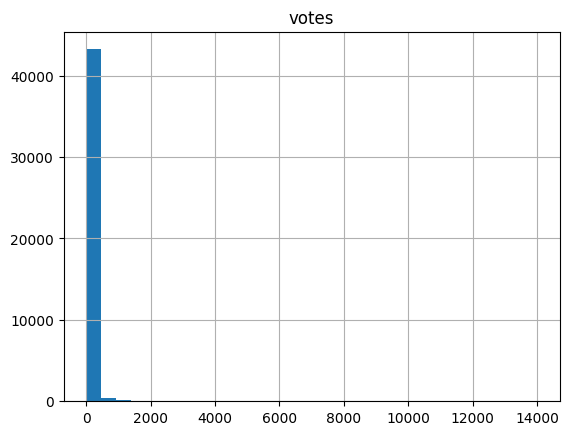

In [265]:
mbti_concat_all.hist('votes', bins=30)

In [266]:
threshold = np.quantile(mbti_concat_all['votes'], 0.75)
print(threshold)

25.0


In [267]:
mbti_all_cutoff = mbti_concat_all[mbti_concat_all['votes']>threshold]
len(mbti_all_cutoff)

10725

array([[<Axes: title={'center': 'votes'}>]], dtype=object)

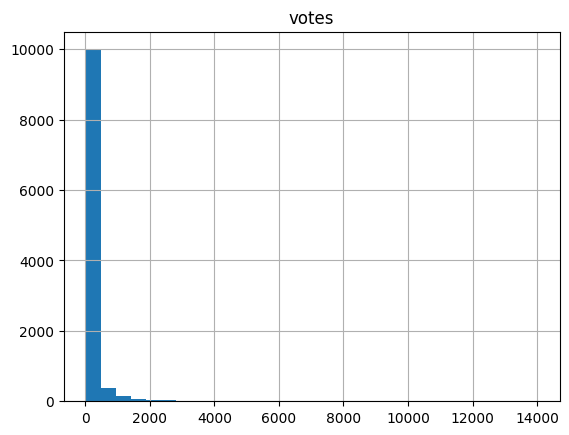

In [268]:
mbti_all_cutoff.hist('votes', bins=30)

In [270]:
mbti_all_cutoff.head(50)

,char,movie,mbti,votes
36567,Tyler Durden,Fight Club (1999),ENTP,14000
24886,Bruno Madrigal,Encanto (2021),INFJ,8600
24884,Elsa,Frozen (Franchise),INFJ,8500
41059,Patrick Bateman,American Psycho (2000),ENTJ,8100
43569,Loki Laufeyson,MCU: The Villains,INFJ,7300
...,...,...,...,...
31967,"Finnegan ""Finn"" Bell",Great Expectations (1998),INFP,26
25894,Moisés Viktor,Dan Life,INFJ,26
9143,Raoul de Chagny,Phantom of The Opera: At The Royal Albert Hall,ESFJ,26
32148,Stands With A Fist,Dances with Wolves (1990),INFP,26


In [ ]:
mbti_all_cutoff.to_csv('../data/Data - Movie Characters MBTI clean.csv', index=False) 